<br>

# Topics:
- 01: Read and show image.
- 02: Show multiple image in one Window and resizing.
- 03: Image show in sliding.
- 04: draw Function in OpenCV.
- 05: Import Func **(shpae,size,type,split,merge,add,addWeight).**
- 06: Bitwize Operator **(And, Or, not, exor).**
<br>

<br>

# `#01: Read and show image:`

<br>



**Read an image:**

`cv2.imread() Second argument is a flag which specifies the way image should be read.
flag  integer value  description:`

- **cv2.IMREAD_COLOR:** 1  Loads a color image.
- **cv2.IMREAD_GRAYSCALE:** 0  Loads image in grayscale mode
- **cv2.IMREAD_UNCHANGED:**  -1  Loads image as such including alpha channel


In [5]:

import cv2 as cv 

# if we give a wrong image path then we get None 
img = cv.imread('wrong/path') 
print(img)


colorImg = cv.imread(filename='data/lena.jpg',flags=1)
grayImg = cv.imread(filename='data/lena.jpg',flags=0)
unchangeImg = cv.imread('data/lena.jpg',flags=-1)

cv.imshow(winname="colorImg",mat=colorImg)
cv.imshow(winname="grayImg",mat=grayImg)
cv.imshow(winname="unchangeImg",mat=unchangeImg)

if cv.waitKey(0) == ord('q'):
    # we can destory a specific windows
    # cv.destroyWindow(winname="colorImg")
    cv.destroyAllWindows()

# why use use waitKey and its value to 0. what is the ord() and destroyAllWindows() function does?


None


[ WARN:0@256.589] global loadsave.cpp:268 findDecoder imread_('wrong/path'): can't open/read file: check file path/integrity



`why use use waitKey and its value to 0. what is the ord() and destroyAllWindows() function does?`
<br>

---
- `waitKey(0)`: Waits indefinitely for a key press, keeping the OpenCV windows open.
- `ord('q')`: Gets the Unicode code point for the letter 'q', used as a condition to exit the `waitKey(0)` loop when the 'q' key is pressed.
- `destroyAllWindows()`: Closes all OpenCV windows when the program exits.

---

**In this we will use IPython to show in image in with our notebook:**


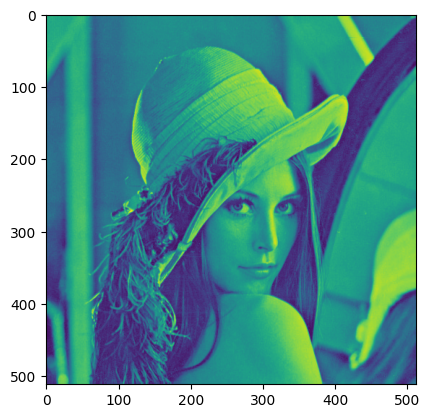

In [3]:

from IPython.display import display,Image
import matplotlib.pyplot as plt 

grayImg = cv.imread(filename="data/lena.jpg",flags=cv.IMREAD_GRAYSCALE)
plt.imshow(colorImg)


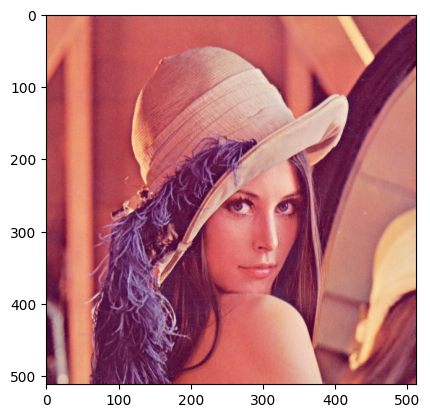

In [4]:

colorImg = cv.imread(filename="data/lena.jpg",flags=cv.IMREAD_COLOR_RGB)
plt.imshow(colorImg)


<br>

# `#02  Show multiple image in one Window and resizing:`

<br>

In [14]:


# numpy vstack and hstack:
import numpy as np 
arr1 = [1,2,3,4,5]
arr2 = [6,7,8,9,10]

print("Vartical stacking: ")
print(np.vstack((arr1,arr2)))

print()
print("Horizontal stacking:")
print(np.hstack((arr1,arr2)))


Vartical stacking: 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]

Horizontal stacking:
[ 1  2  3  4  5  6  7  8  9 10]


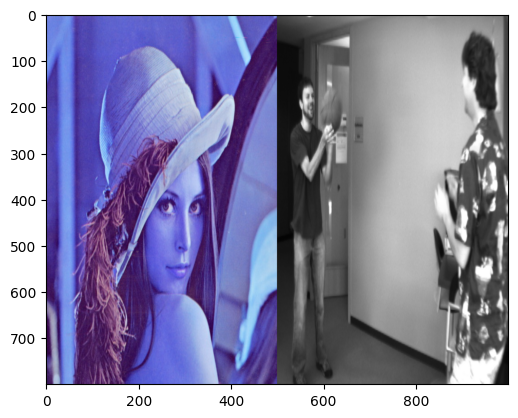

In [15]:

import numpy as np 

colorImg = cv.imread(filename='data/lena.jpg')
otherImg = cv.imread(filename="data/basketball1.png")

#image_array = np.hstack((colorImg,grayImg))
# i got an error because imagesize are not same:
re_colorImg = cv.resize(src=colorImg,dsize=(500,800))
re_otherImg = cv.resize(src=otherImg,dsize=(500,800))
image_array1 = np.hstack(tup=(re_colorImg,re_otherImg))

plt.imshow(image_array1)


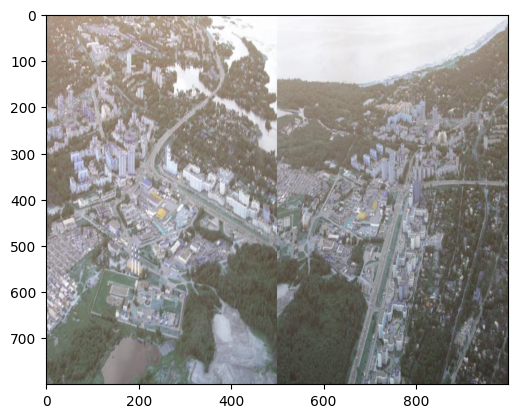

In [17]:

img1 = cv.imread(filename="data/aero1.jpg",flags=-1)
img2 = cv.imread(filename="data/aero3.jpg",flags=-1)

img1 = cv.resize(src=img1,dsize=(500,800))
img2 = cv.resize(src=img2,dsize=(500,800))

image_array2 = np.hstack(tup=(img1,img2)) 
plt.imshow(image_array2)

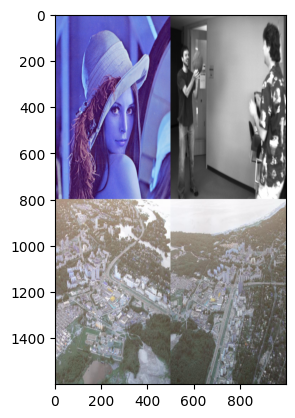

In [18]:

four_image = np.vstack(tup=(image_array1,image_array2))
plt.imshow(four_image)


<br>

# `#03 Show image like sliding windows:`
<br>


In [20]:

import os 

list = os.listdir(path=os.path.join("data"))
list[:5]

['left07.jpg', 'leuvenA.jpg', 'imageTextN.png', 'right09.jpg', 'digits.png']

In [22]:

for img_path in list[:5]:
    path = os.path.join("data",img_path) 
    img = cv.imread(filename=path)
    img = cv.resize(src=img,dsize=(500,800))
    cv.imshow(winname="SlideShow",mat=img)
    cv.waitKey(delay=1000)
    
cv.destroyAllWindows()


<br>

# `#04 draw Function in OpenCV:`
<br>

shape height,width (512, 512, 3)


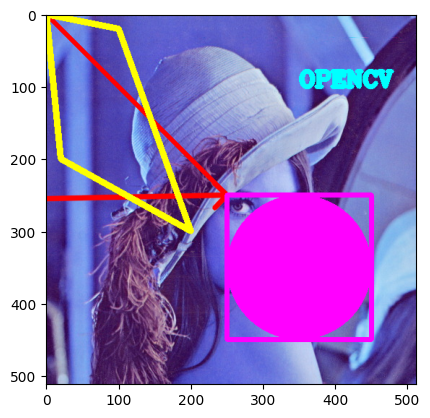

In [69]:

img = cv.imread(filename="data/lena.jpg",flags=-1)

print("shape height,width {}".format(img.shape))

# ------------------- Line ---------------------------------------
cv.line(img=img,pt1=(0,0),pt2=(250,250),
        color=(255,0,0),thickness=5,lineType=cv.LINE_4)

# ------------------- Arrowed Line ------------------------------
cv.arrowedLine(img=img,pt1=(0,255),pt2=(250,250),
               color=(255,0,0),thickness=5,line_type=cv.LINE_AA)

# ------------------- Rectangle  -----------------------------------------------
"""

x1,y1____________________
|                        |
|                        |
|                        |
_____________________x2,y2

"""
cv.rectangle(img=img,pt1=(250,250),pt2=(450,450),color=(255,0,255),thickness=5)

# ------------------- Circle  -------------------------------------------------
cv.circle(img=img,center=(350,350),radius=100,color=(255,0,255),thickness=-1)

# ------------------- Put Text  -----------------------------------------------
cv.putText(img=img,text="OPENCV",org=(350,100),fontFace=cv.FONT_HERSHEY_COMPLEX,fontScale=1,
           color=(0,255,255),thickness=5)

# ------------------- Polygoan shpae  -----------------------------------------------
#pts: is_numpy_array like [np.array([[],[],[]])]
cv.polylines(img=img,
             pts=[np.array([[0, 0], [100, 20], [200, 300],[20,200]])],
             isClosed=True,
             color=(255,255,0),thickness=8,
             lineType=cv.LINE_8)
plt.imshow(img)

    

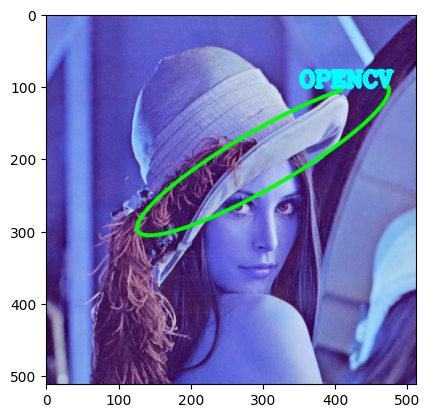

In [63]:

# ------------------- Ellipse  -------------------------------------------------
# axes = (major,minor)
# angle: angle respect to minor axis
# startAngle,endAngle: boundary(0,360)

img = cv.imread(filename="data/lena.jpg")

cv.putText(img=img,text="OPENCV",org=(350,100),fontFace=cv.FONT_HERSHEY_COMPLEX,fontScale=1,
           color=(0,255,255),thickness=5)

cv.ellipse(img = img,
    center=(300,200),
    axes=(200,40),
    angle=-30,
    startAngle=0,
    endAngle=315,
    color=(0,255,0),
    thickness=4,
    lineType=cv.LINE_AA)
plt.imshow(img)




<br>

# `#05: Important Function **(shpae,size,type,split,merge,add,addWeight):**

<br>

- shape, size=Total_pixel and dtype:

shpae: (342, 548, 3)
totol pixel: 562248
data type: uint8


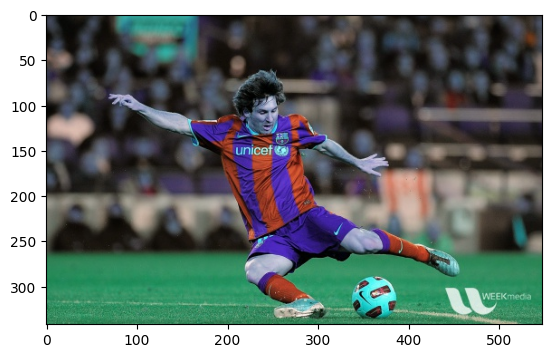

In [77]:

# **shape** , **size=total_pixel**, **dtype**:

img = cv.imread('data/messi5.jpg')

print(f"shpae: {img.shape}") # height, width , channel
print(f"totol pixel: {img.size}") # total pixel 
print(f"data type: {img.dtype}") # dtype of image pixel  


# Orginal image:
plt.imshow(img)




- **cv.split()**

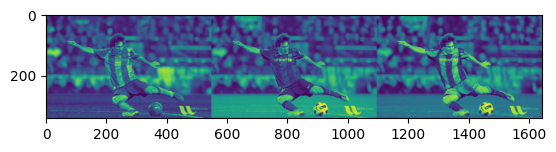

In [78]:

# **************Split Function*******************

# split the RGB image all the color channel:
b,g,r = cv.split(img)

# orginal image and blue channel:
merge_image1 = np.hstack(tup=(b,g,r))
plt.imshow(merge_image1)



- **cv.merge()**

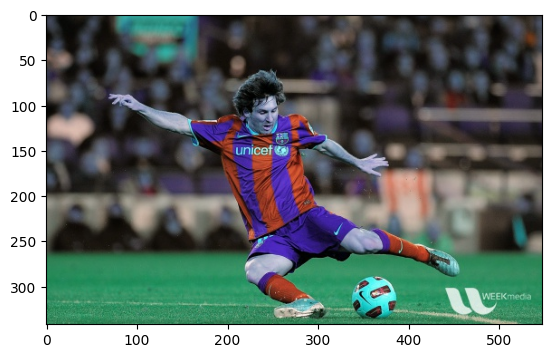

In [80]:

# **************Merge Function*******************

# get the orginal image:
merge_img = cv.merge(mv=(b,g,r)) 
plt.imshow(merge_img)



- **ROI:(Region Of Interest)**

    `The region of image that we are want to work with it.` <br>
    `In the above image it would be ball`

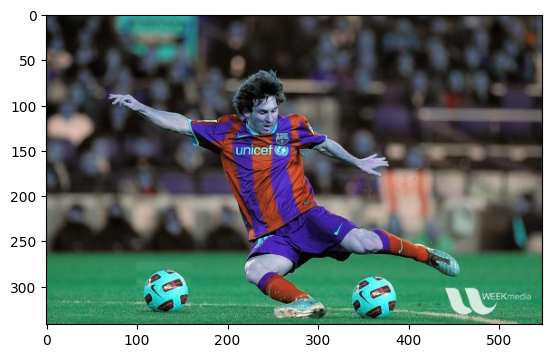

In [81]:

img = cv.imread('data/messi5.jpg')

ball = img[280:340,330:390]

img[273:333,100:160] = ball

plt.imshow(img)



- **cv.add():**

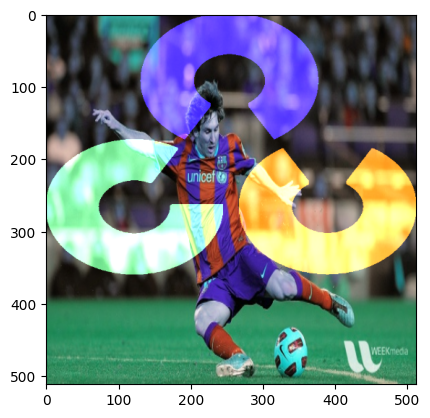

In [82]:

img = cv.imread('data/messi5.jpg')
img1 = cv.imread('data/opencv-logo.png')

# we can't use add method if the size is not same :
img = cv.resize(img,(512,512))
img1 = cv.resize(img1,(512,512))

final = cv.add(img,img1)
plt.imshow(final)



- **cv.weighted():**

---

Parameters of `addWeighted` function:

-  **`source img`**: This is one of the input images to be blended.

- **`alpha of img 0.9`**:  This is the weight (or blending factor) assigned to the first image (`img`). It determines how much of `img` will contribute to the final blended image. Here, it's 0.9, meaning 90% of the intensity of `img` will be preserved in the final image.

-  **`source img1`**: This is the second input image to be blended.

-  **`beta of img1 0.1`**:  This is the weight assigned to the second image (`img1`). Similar to the first weight, it determines how much of `img1` will contribute to the final blended image. Here, it's 0.1, meaning 10% of the intensity of `img1` will be preserved in the final image.

- **`gamma 0`**:  This is a scalar value added to each pixel after blending. It's optional and is set to 0 in this case.

The range of the weights should be between 0 and 1, where 0 means no contribution from that image, and 1 means full contribution. The sum of the weights should be 1.

**Formula:** src1(I) x alpha + src2(I) x beta + gamma  

---

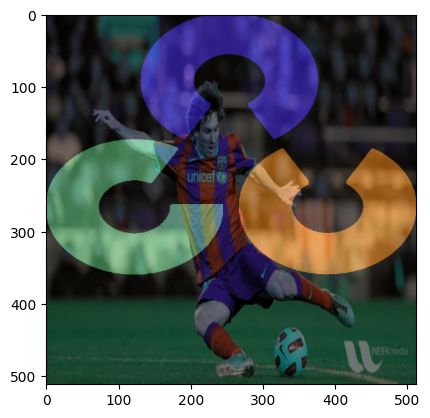

In [84]:
img = cv.imread('data/messi5.jpg')
img1 = cv.imread('data/opencv-logo.png')

# we can't use add method if the size is not same :
img = cv.resize(img,(512,512))
img1 = cv.resize(img1,(512,512))


final = cv.addWeighted(src1=img,alpha=0.5,src2=img1,beta=0.5,gamma=0)

plt.imshow(final)


<br>

# `#06 Bitwize Operator **(And, Or, not, exor)**`

<br>

<br>

### We use bitwize operation while working with mask:

In OpenCV (Open Source Computer Vision Library), a mask is a binary image used to specify certain regions of interest(ROI) or to filter out unwanted parts of an image. A mask image consists of pixels with values of either 0 or 255 (or sometimes 0 or 1), where 0 typically represents the background or areas to be ignored, and 255 represents the foreground or areas to be considered.

Masks are commonly used in image processing tasks such as:

1. **Region of Interest (ROI) selection**: You can apply a mask to focus on specific parts of an image for further processing while ignoring the rest.

2. **Image Filtering**: By applying a mask, you can perform operations only on certain regions of an image, leaving other areas unchanged.

3. **Image Segmentation**: Masks are used to separate objects of interest from the background by assigning different values to pixels inside and outside the objects.

4. **Image Blending**: Masks can be used to blend two images together seamlessly by specifying which parts of each image should contribute to the final result.

<br>

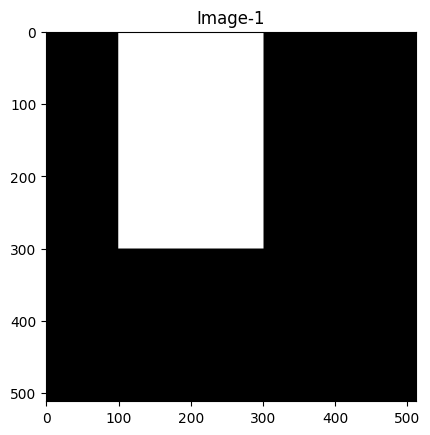

In [104]:

img1 = np.zeros((512,512,3),np.uint8)
img2 = np.zeros((512,512,3),np.uint8)
cv.rectangle(img1,(100,0),(300,300),(255,255,255),-1)
cv.rectangle(img2,(200,0),(400,200),(255,255,255),-1)
plt.title("Image-1")
plt.imshow(img1)


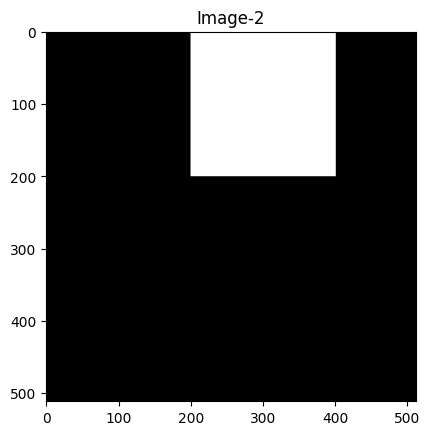

In [105]:

plt.title("Image-2")
plt.imshow(img2)


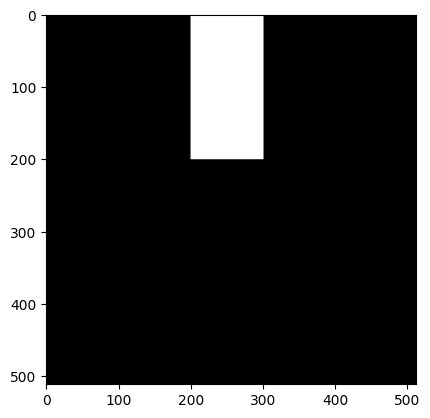

In [107]:

# common part (200~300) (0~200)
bit_wize_and = cv.bitwise_and(img1,img2)
plt.imshow(bit_wize_and)


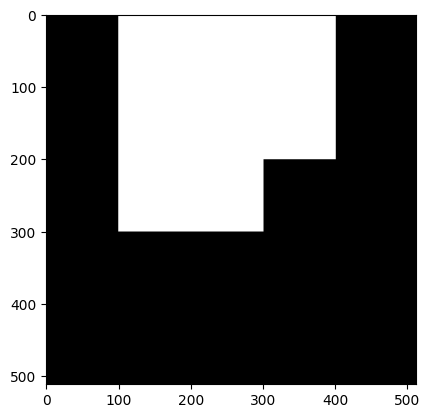

In [109]:
# or Operation: 0 1 = 1 
# or operation: 1 0 = 1
# or operation: 1 1 = 1 
bit_wize_or = cv.bitwise_or(img1,img2)
plt.imshow(bit_wize_or)


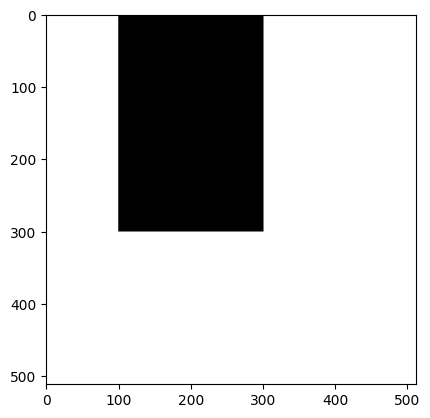

In [115]:

bit_wize_not = cv.bitwise_not(img1)
plt.imshow(bit_wize_not)

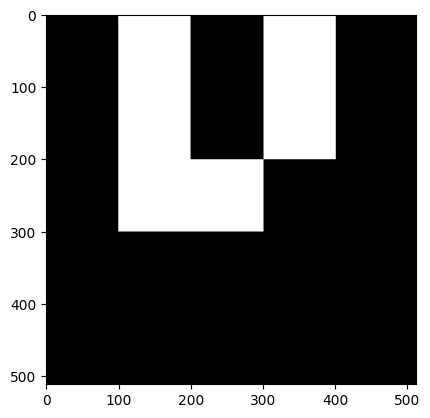

In [114]:
# xor truth table:
# 1 1 = 0
# 1 0 = 1
bit_wize_xor = cv.bitwise_xor(img1,img2)
plt.imshow(bit_wize_xor)